In [1]:
# uncomment the line below to enable realtime graphs
# %matplotlib ipympl

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from custom_interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(True)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.8 sec. Average model step in 0.0319 ms.


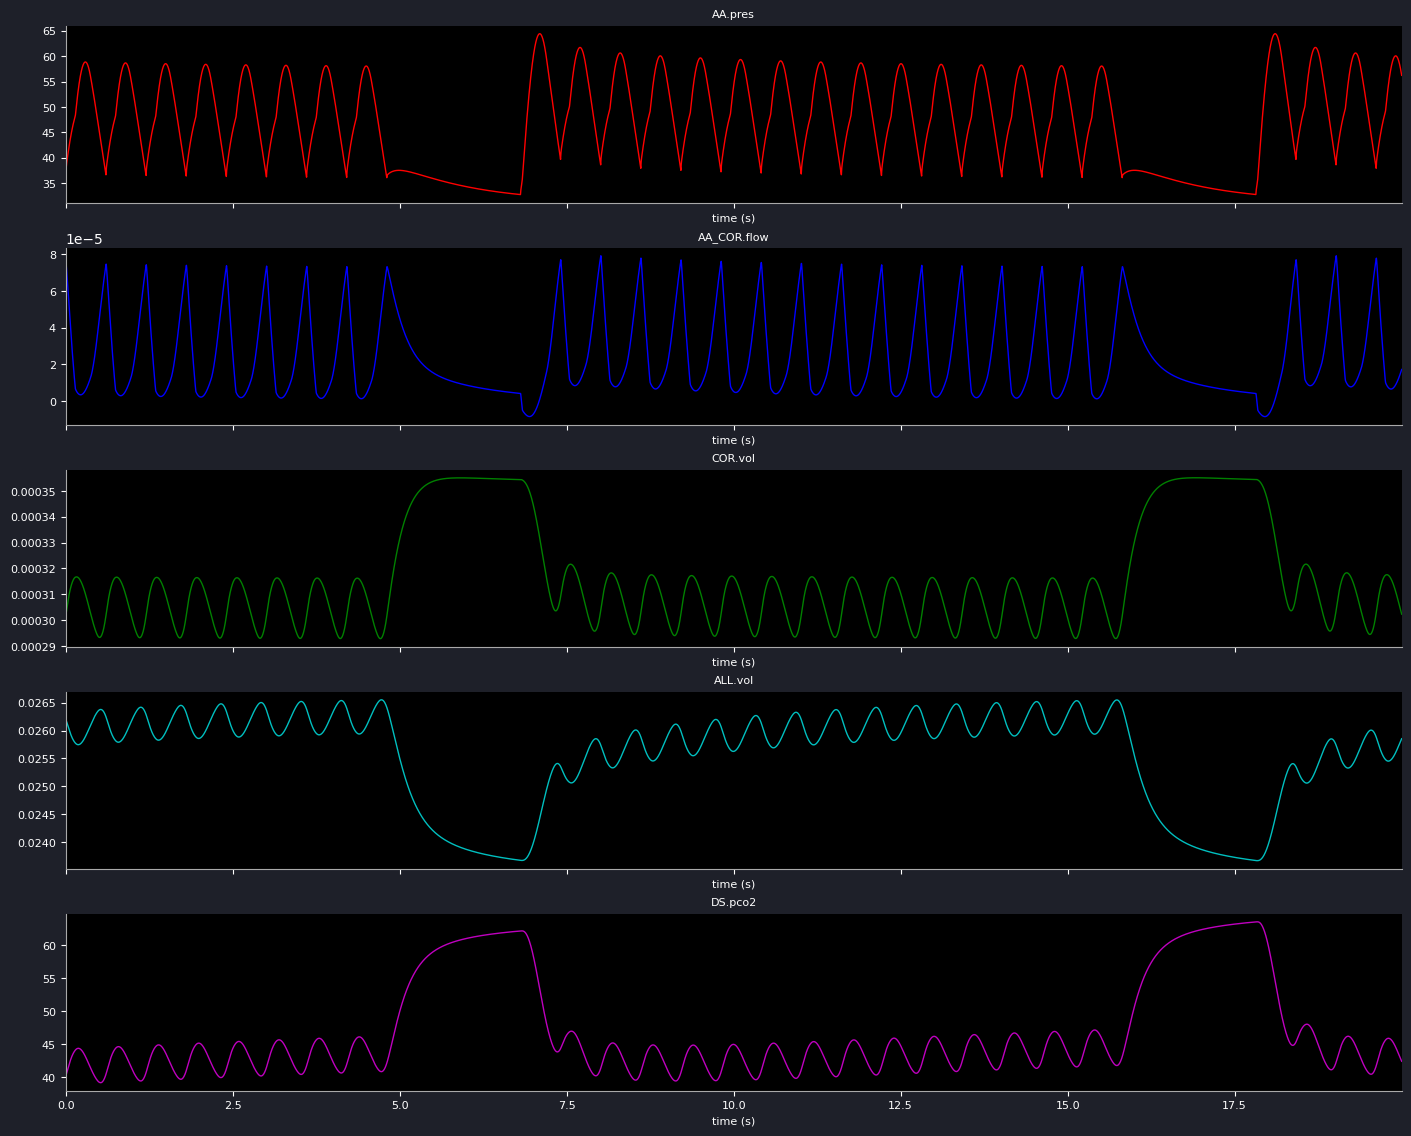

AA.pres         : max   64.42708, min    32.7571 mmHg
AA_COR.flow     : net     1.4919, forward    1.50155, backward   -0.00965 ml/min, stroke volume:    0.01776 ml, 
COR.vol         : max    0.35511, min    0.29283 ml
ALL.vol         : max   26.55421, min   23.66505 ml
DS.pco2         : max   63.55497 min   39.17043


In [6]:
models["Resuscitation"].start_cpr()
models["Resuscitation"].compressions = 15
models["Resuscitation"].chest_comp_pres = 40
neo.plot_time_graph(
    ["AA.pres", "AA_COR.flow", "COR.vol", "ALL.vol","DS.pco2"],
    combined=False,
    sharey=False,
    sampleinterval=0.0005,
    fill=False,
    time_to_calculate = 20
)

In [ ]:
neo.get_bloodgas("AA")

In [5]:
neo.fast_forward(120)

 Ready in 6.7 sec. Average model step in 0.0280 ms.


In [ ]:
neo.analyze_heart()